In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
nba =  pd.read_csv('players_stats_new.csv')
nba.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Birth_Place,Birthdate,Collage,Experience,Pos,Team,Age,Height,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,us,7-Oct-86,University of Connecticut,5,PG,PHO,29,185.0,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,us,14-Jan-85,University of Oregon,6,PG,CHI,30,180.0,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,us,16-Sep-95,University of Arizona,R,PF,ORL,20,202.5,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,us,19-Feb-91,Michigan State University,R,PF,ATL,24,205.0,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,do,3-Jun-86,University of Florida,7,C,ATL,29,205.0,110.25,26.234384


In [3]:
nba = nba.drop(['MIN','FGA','FG%','3PM','3PA','FTM','FTA','OREB','DREB','BLK','TOV','EFF','AST/TOV','STL/TOV','Age','Birth_Place','Birthdate','Collage','Experience','Height','Pos','Team','Weight','BMI'], axis=1)
# 'Name','Games Played', 'PTS','FGM', '3P%', 'FT%', 'REB','AST','STL','PF'
nba

,Name,Games Played,PTS,FGM,3P%,FT%,REB,AST,STL,PF
0,AJ Price,26,133,51,26.3,66.7,32,46,7,15
1,Aaron Brooks,82,954,344,38.7,83.3,166,261,54,189
2,Aaron Gordon,47,243,93,27.1,72.1,169,33,21,83
3,Adreian Payne,32,213,91,11.1,65.2,162,30,19,88
4,Al Horford,76,1156,519,30.6,75.9,544,244,68,121
5,Al Jefferson,65,1082,486,40.0,65.5,548,113,47,139
6,Alan Anderson,74,545,195,34.8,81.2,204,83,56,148
7,Alec Burks,27,374,121,38.2,82.2,114,82,17,64
8,Alex Kirk,5,4,1,0.0,100.0,1,1,0,1
9,Alex Len,69,432,179,33.3,70.2,454,32,34,213


In [4]:
Xnba = nba.iloc[:, 1:10].values
Xnba

array([[ 26., 133.,  51., ...,  46.,   7.,  15.],
       [ 82., 954., 344., ..., 261.,  54., 189.],
       [ 47., 243.,  93., ...,  33.,  21.,  83.],
       ...,
       [ 33., 386., 158., ...,  36.,  18.,  78.],
       [ 82., 807., 309., ...,  86.,  53., 136.],
       [ 52., 278., 104., ...,  75.,  53.,  67.]])

In [5]:
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')

In [6]:
# Aplicando o K-Means
kmeans.fit(Xnba)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Aplicando o K-Means
kmeans.fit(Xnba)

In [7]:
# Listando os Centroids para cada um dos 03 Clusters
kmeans.cluster_centers_

array([[  36.96842105,  169.83157895,   63.93157895,   22.32684211,
          65.37736842,   95.04210526,   42.84210526,   17.06842105,
          55.55263158],
       [  68.61764706,  672.25      ,  252.84558824,   28.56470588,
          75.03014706,  292.55882353,  151.22058824,   51.56617647,
         142.44852941],
       [  74.26315789, 1269.87719298,  470.92982456,   30.63508772,
          78.35263158,  466.19298246,  254.9122807 ,   83.98245614,
         169.85964912]])

In [8]:
# Realcula os Centroids..
kmeans.fit(Xnba)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[  68.61764706,  672.25      ,  252.84558824,   28.56470588,
          75.03014706,  292.55882353,  151.22058824,   51.56617647,
         142.44852941],
       [  36.96842105,  169.83157895,   63.93157895,   22.32684211,
          65.37736842,   95.04210526,   42.84210526,   17.06842105,
          55.55263158],
       [  74.26315789, 1269.87719298,  470.92982456,   30.63508772,
          78.35263158,  466.19298246,  254.9122807 ,   83.98245614,
         169.85964912]])

In [10]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias
# Calcula a distancia entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(Xnba)
distance

array([[1316.58285543,  656.21226178,   85.9755832 ],
       [ 455.47463941,  343.92442379,  876.22805747],
       [1160.68200269,  493.95904437,  112.70604645],
       ...,
       [1001.26278162,  340.99145455,  268.22643667],
       [ 573.50675469,  174.08251344,  703.73393497],
       [1105.44447993,  440.71063604,  180.57191091]])

In [11]:
# Para cada uma das instâncias, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
labels = kmeans.labels_
labels

array([2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2,

In [12]:
nba['cluster'] = labels
nba

,Name,Games Played,PTS,FGM,3P%,FT%,REB,AST,STL,PF,cluster
0,AJ Price,26,133,51,26.3,66.7,32,46,7,15,2
1,Aaron Brooks,82,954,344,38.7,83.3,166,261,54,189,1
2,Aaron Gordon,47,243,93,27.1,72.1,169,33,21,83,2
3,Adreian Payne,32,213,91,11.1,65.2,162,30,19,88,2
4,Al Horford,76,1156,519,30.6,75.9,544,244,68,121,0
5,Al Jefferson,65,1082,486,40.0,65.5,548,113,47,139,0
6,Alan Anderson,74,545,195,34.8,81.2,204,83,56,148,1
7,Alec Burks,27,374,121,38.2,82.2,114,82,17,64,2
8,Alex Kirk,5,4,1,0.0,100.0,1,1,0,1,2
9,Alex Len,69,432,179,33.3,70.2,454,32,34,213,1


In [13]:
# Centroides Calculados para cada uma das Features, para cada um dos 3 clusters
kmeans.cluster_centers_

array([[  74.26315789, 1269.87719298,  470.92982456,   30.63508772,
          78.35263158,  466.19298246,  254.9122807 ,   83.98245614,
         169.85964912],
       [  68.61764706,  672.25      ,  252.84558824,   28.56470588,
          75.03014706,  292.55882353,  151.22058824,   51.56617647,
         142.44852941],
       [  36.96842105,  169.83157895,   63.93157895,   22.32684211,
          65.37736842,   95.04210526,   42.84210526,   17.06842105,
          55.55263158]])

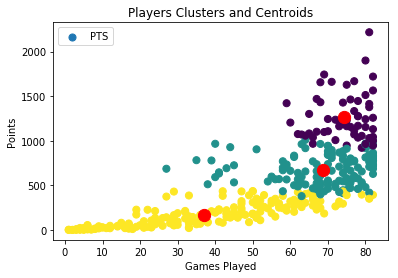

In [14]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['PTS']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Points')
plt.legend()
plt.show()

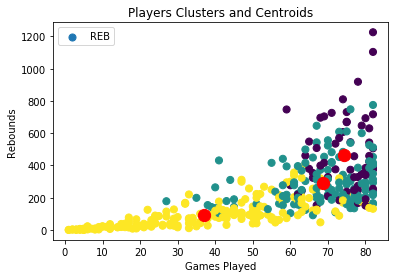

In [15]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['REB']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Rebounds')
plt.legend()
plt.show()

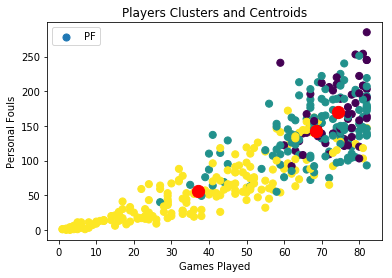

In [16]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['PF']
plt.scatter(x, y, s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 8], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Personal Fouls')
plt.legend()
plt.show()

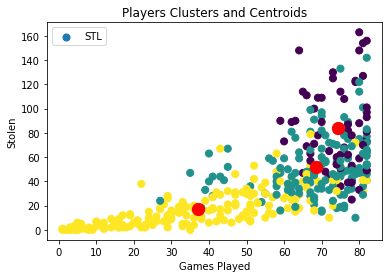

In [17]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['STL']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 7], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Stolen')
plt.legend()
plt.show()

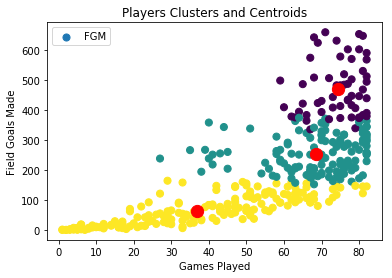

In [18]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['FGM']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Field Goals Made')
plt.legend()
plt.show()

In [19]:
# Vamos agrupar uma nova instância ?
# Dado um perfil de cliente, cliente
# O resultado indica a qual cluster esse novo cliente foi atribuído!
newcustomer = [ [70,750,280,30.8,75.9,380,150,66,146] ]
kmeans.predict(newcustomer)

array([1])

1 101195700.86908615
2 38072486.548767544
3 23999104.118218523
4 17671327.317766726
5 15018116.750096245
6 12663179.275654178
7 11199128.16910145
8 9866033.380431034
9 9138345.665329762
10 8637774.84876242


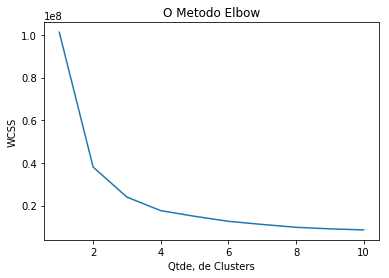

In [20]:
# Metododo de Elbow: como encontrar valor ideal de K ?
# Basicamente o que o método faz é testar a variância dos dados em relação ao número de clu
# O que percebemos no Gráfico abaixo?
# Soma dos erros quadráticos de cada cluster (WCSS) cai e se estabiliza, à medida que aumen
wcss = []
maxclusters = 11
for i in range(1, maxclusters):
 kmeans = KMeans(n_clusters = i, init = 'random')
 kmeans.fit(Xnba)
 print(i,kmeans.inertia_)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, maxclusters), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()